## Visualization using matplotlib  

### Import libraries  

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Parameters  

In [5]:
%config InlineBackend.figure_formats = {'png', 'retina'}  # for high-reso graph
plt.rcParams['font.family'] = 'Yu Mincho' # for Japanese in graph (Win10)

csv_in = '../../AI/ai-0102/pandas_training-utf8.csv'
csv_in2 = '../../AI/ai-0102/2045_2017-utf8.csv'

### Read CSV files  

In [6]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=13, header=0)
print(df.shape)
print(df.info())
display(df.head())

df2 = pd.read_csv(csv_in2, delimiter=',', skiprows=9, header=0)
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')
print(df2.shape)
print(df2.info())
display(df2.head())

(440, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CHANNEL    440 non-null    object
 1   REGION     440 non-null    object
 2   FRESH      440 non-null    int64 
 3   MILK       440 non-null    int64 
 4   GROCERY    440 non-null    int64 
 5   FROZEN     440 non-null    int64 
 6   DET_PAPER  440 non-null    int64 
 7   DELICA     440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB
None


,CHANNEL,REGION,FRESH,MILK,GROCERY,FROZEN,DET_PAPER,DELICA
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Horeca,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


(201, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      201 non-null    datetime64[ns]
 1   Open      201 non-null    int64         
 2   High      201 non-null    int64         
 3   Low       201 non-null    int64         
 4   Close     201 non-null    int64         
 5   Vol       201 non-null    int64         
 6   AdjClose  201 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 11.1 KB
None


,Date,Open,High,Low,Close,Vol,AdjClose
0,2017-01-04,9340,9340,9270,9270,6,9270
1,2017-01-05,9260,9340,9250,9260,22,9260
2,2017-01-06,9300,9380,9300,9380,69,9380
3,2017-01-10,9380,9390,9320,9370,465,9370
4,2017-01-11,9400,9520,9400,9490,233,9490


### Histogram  

findfont: Font family ['Yu Mincho'] not found. Falling back to DejaVu Sans.


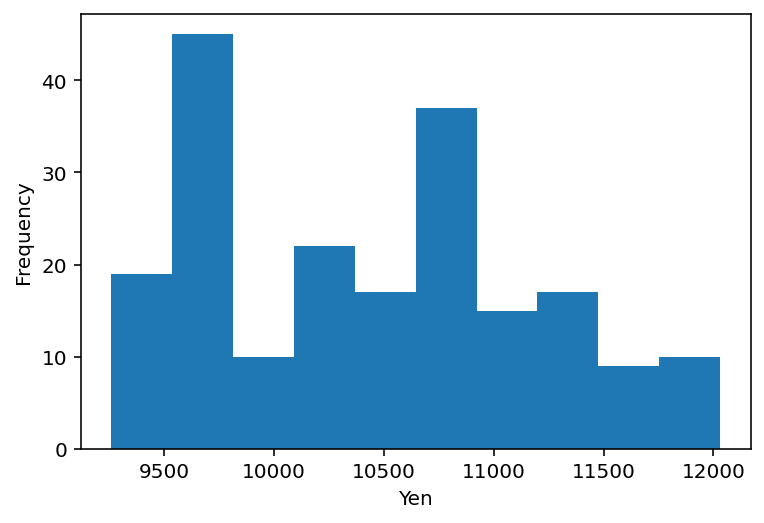

In [7]:
ser_aclose = df2['AdjClose']
plt.hist(ser_aclose, bins=10)
plt.xlabel('Yen')
plt.ylabel('Frequency')
plt.show()

### Change faces 

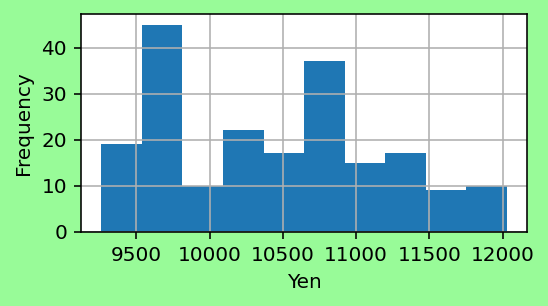

In [8]:
plt.figure(figsize=(4,2), facecolor='palegreen')
plt.grid(True)

ser_aclose = df2['AdjClose']
plt.hist(ser_aclose, bins=10)
plt.xlabel('Yen')
plt.ylabel('Frequency')
plt.show()

### Line plot

In [9]:
#help(plt.plot)

findfont: Font family ['Yu Mincho'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Yu Mincho'] not found. Falling back to DejaVu Sans.


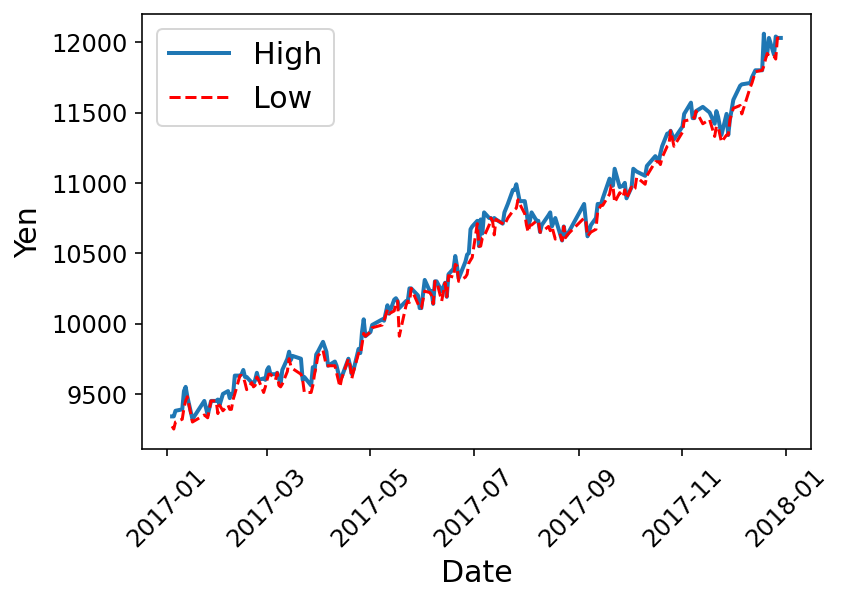

In [10]:
ser_date = df2['Date']
ser_high = df2['High']
ser_low = df2['Low']
plt.plot(ser_date, ser_high, linewidth=2, label='High')
plt.plot(ser_date, ser_low, 'r--', label='Low')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Yen', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

#### Add moving average line  

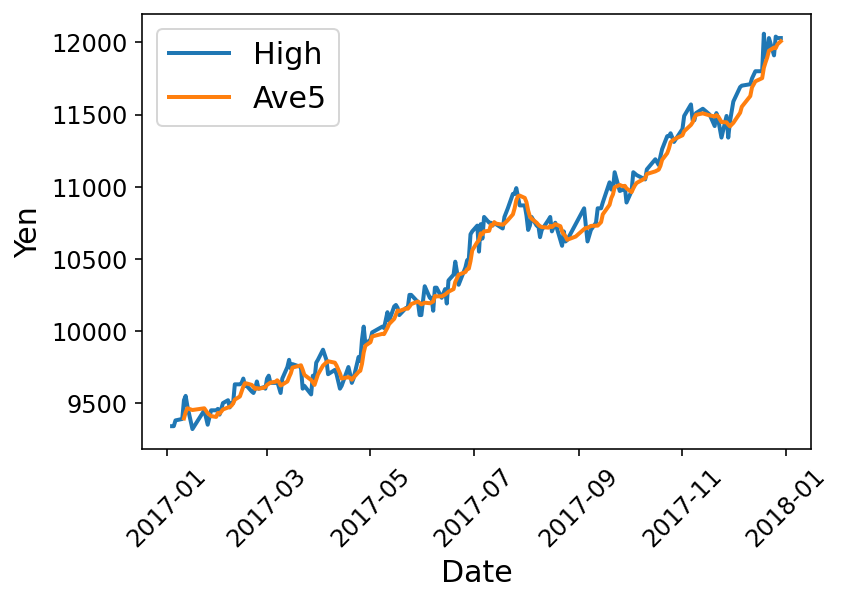

In [11]:
ser_date = df2['Date']
ser_high = df2['High']
ser_5_ave = ser_high.rolling(window=5).mean()
plt.plot(ser_date, ser_high, linewidth=2, label='High')
plt.plot(ser_date, ser_5_ave, linewidth=2, label='Ave5')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Yen', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

### Scatter plot  

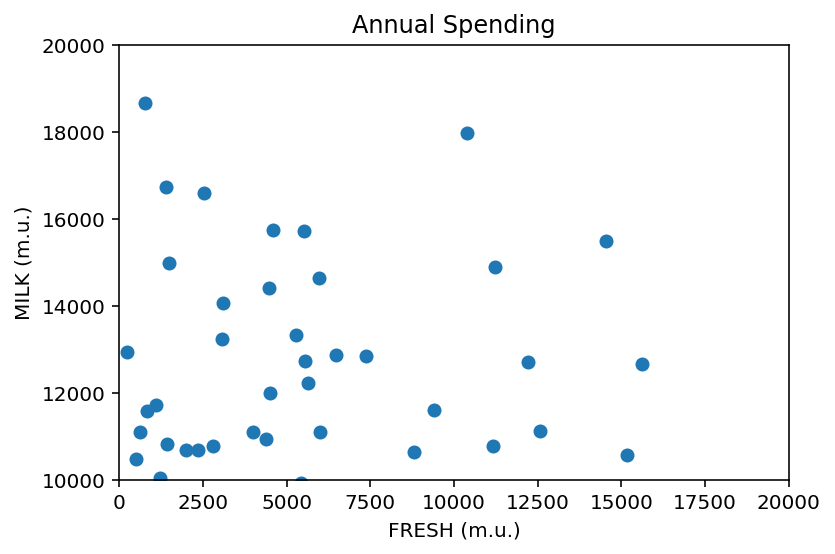

In [12]:
ser_fresh = df['FRESH']
ser_milk = df['MILK']
plt.scatter(ser_fresh, ser_milk, marker='o')
plt.title('Annual Spending')
plt.xlabel('FRESH (m.u.)')
plt.ylabel('MILK (m.u.)')
plt.xlim(0,20000)
plt.ylim(10000,20000)
plt.show()

### Multiple box plot

,FRESH,MILK,GROCERY,FROZEN,DET_PAPER,DELICA
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


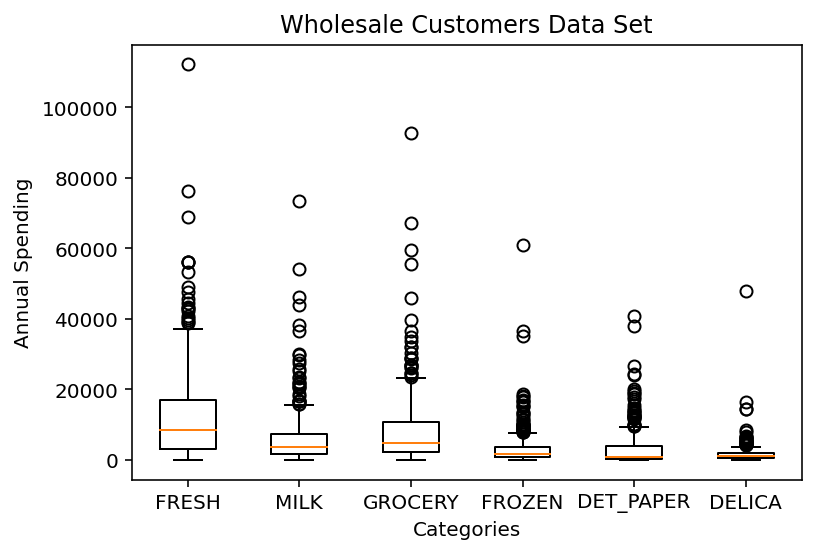

In [13]:
df_num = df.loc[:, 'FRESH':]
display(df_num.head())
plt.boxplot(df_num.values)
plt.title('Wholesale Customers Data Set')
plt.xticks(range(1,df_num.shape[1]+1),df_num.columns)  # set xticklabels to columns
plt.xlabel('Categories')
plt.ylabel('Annual Spending')
plt.show()

### Bar graph

FRESH        12000.297727
MILK          5796.265909
GROCERY       7951.277273
FROZEN        3071.931818
DET_PAPER     2881.493182
dtype: float64


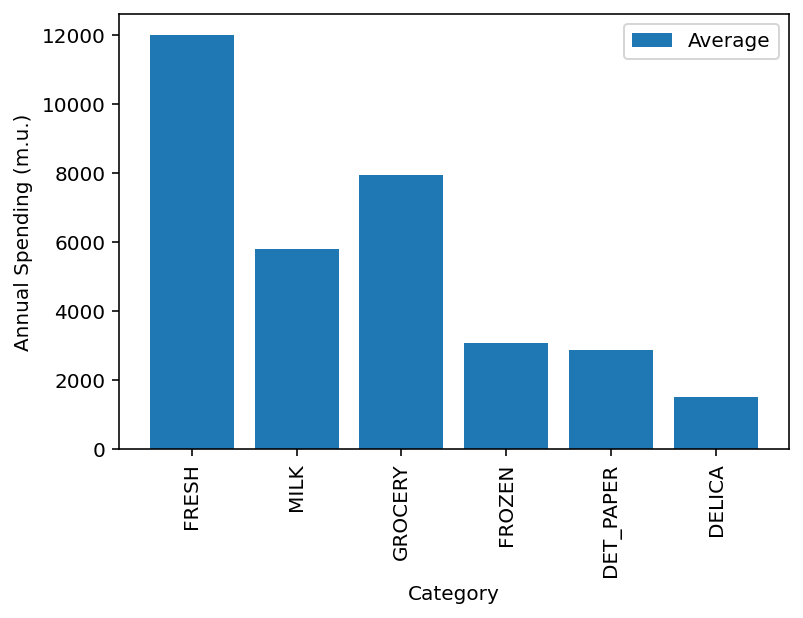

In [14]:
ser_ave = df.mean()
print(ser_ave.head())  # debug
plt.bar(ser_ave.index, ser_ave, label='Average')
plt.xlabel('Category')
plt.ylabel('Annual Spending (m.u.)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Bar graph (horizontal)

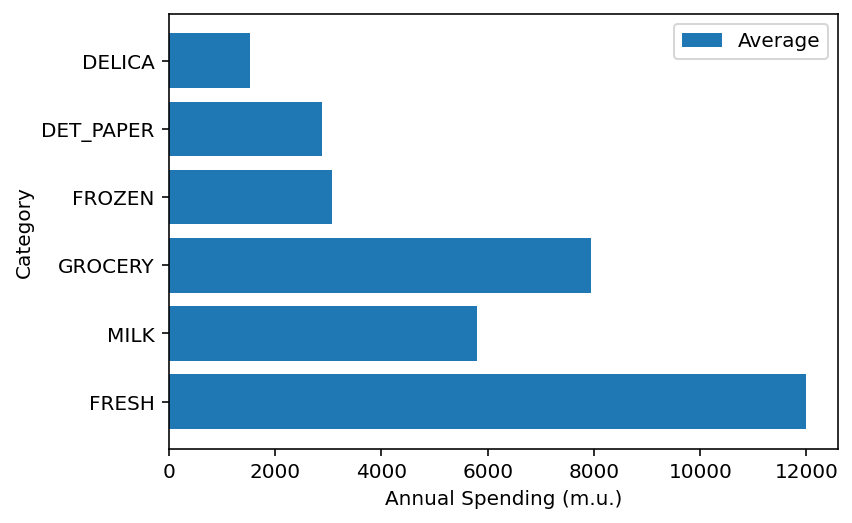

In [15]:
plt.barh(ser_ave.index, ser_ave, label='Average')
plt.ylabel('Category')
plt.xlabel('Annual Spending (m.u.)')
plt.legend()
plt.show()

### Multiple bar graph  
Bar graph of ave for REGION:Lisbon, Oporto, Other

,FRESH,MILK,GROCERY,FROZEN,DET_PAPER,DELICA
REGION,,,,,,
Lisbon,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
Oporto,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
Other,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


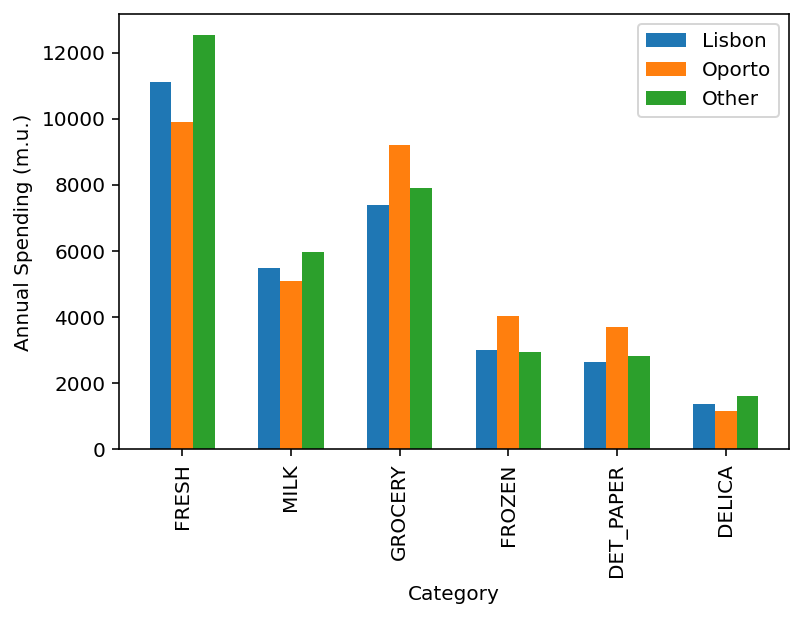

In [16]:
df_reg_ave = df.groupby('REGION').mean()
display(df_reg_ave.head())
X = np.array(range(df_reg_ave.shape[1]))
plt.xticks(X,df_reg_ave.columns)
w=0.2
plt.bar(X-w,df_reg_ave.loc['Lisbon'],width=0.2,label='Lisbon')
plt.bar(X,df_reg_ave.loc['Oporto'],width=0.2,label='Oporto')
plt.bar(X+w,df_reg_ave.loc['Other'],width=0.2,label='Other')
plt.xlabel('Category')
plt.ylabel('Annual Spending (m.u.)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Stacked bar graph  

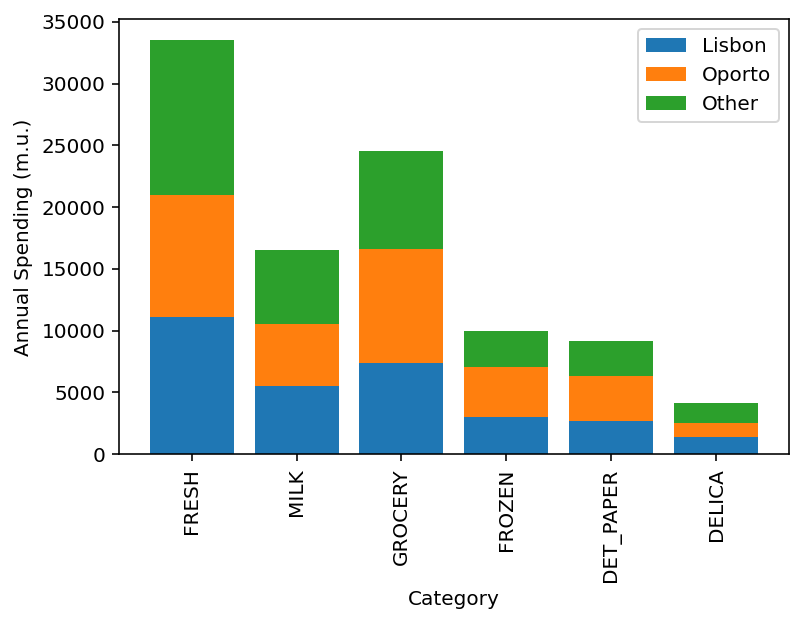

In [17]:
height = np.zeros(df_reg_ave.shape[1])
#print(height)  # debug
X = np.array(range(df_reg_ave.shape[1]))
#print(X)  # debug
plt.xticks(X, df_reg_ave.columns)
#print(df_reg_ave.columns)  # debug
for i,r in df_reg_ave.iterrows():
    #print(r)  # debug
    plt.bar(X, r, bottom=height, label=r.name)
    #print(height)  # debug
    #print(r.name)  # debug
    height+=r
plt.xlabel('Category')
plt.ylabel('Annual Spending (m.u.)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Pie chart  

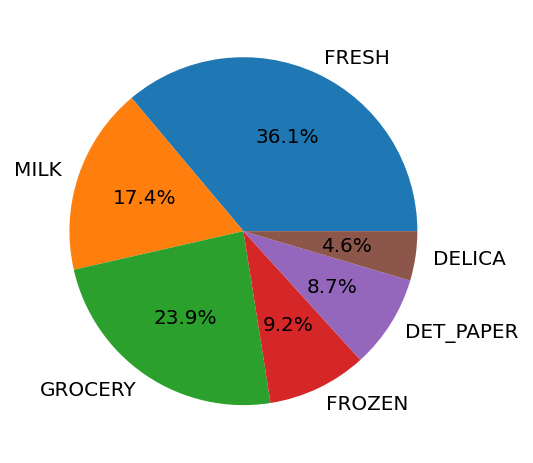

In [18]:
plt.pie(ser_ave, autopct="%.1f%%", labels=ser_ave.index)
plt.show()

### (Adv) Pie chart 2 

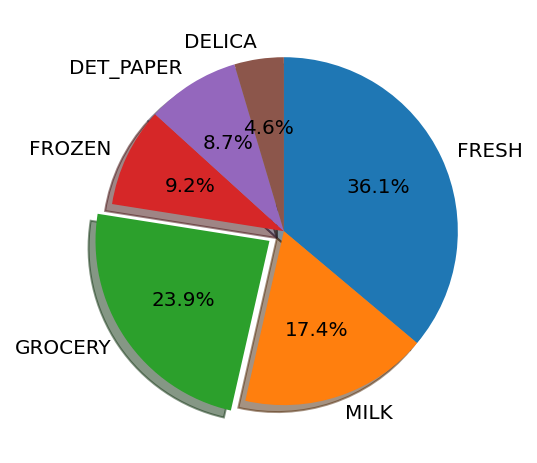

In [19]:
explodes = np.zeros(len(ser_ave))
explodes[2] = 0.1
plt.pie(ser_ave, autopct="%.1f%%", shadow=True, 
        startangle=90, counterclock=False,
        explode=explodes,
        labels=ser_ave.index)
plt.show()

In [20]:
#help(plt.pie)

In [21]:
#help(plt.errorbar)

### Error bars for line plot

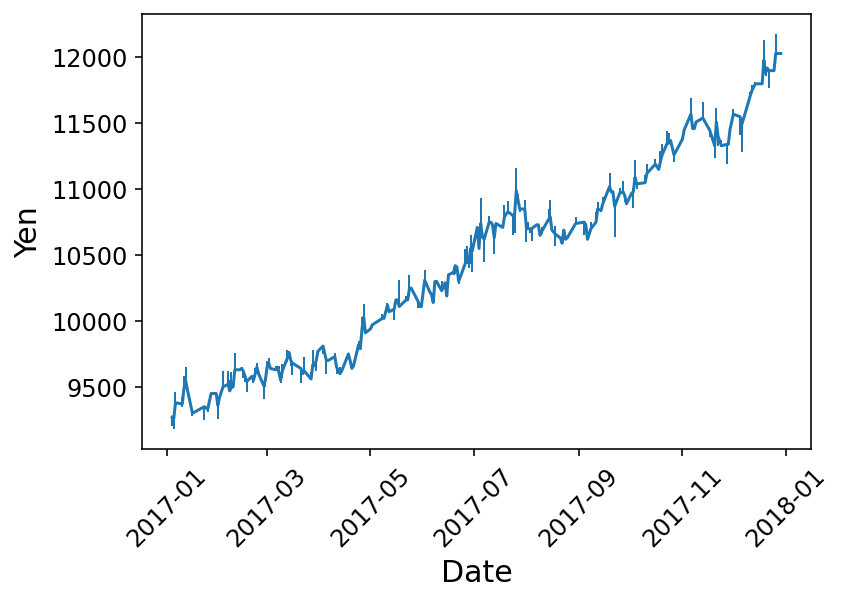

In [22]:
ser_date = df2['Date']
ser_high = df2['High']
ser_low = df2['Low']
ser_close = df2['Close']
up = ser_high-ser_close
down = ser_close-ser_low
rng = np.array([up, down])

plt.errorbar(ser_date, ser_close, yerr=rng, elinewidth=1)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Yen', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

### Error bars for bar graph

(array([-1425.72121684,  -831.98281932, -1071.28240413,  -547.26265482,
        -537.47564547,  -317.90782951]), array([1425.72121684,  831.98281932, 1071.28240413,  547.26265482,
        537.47564547,  317.90782951]))


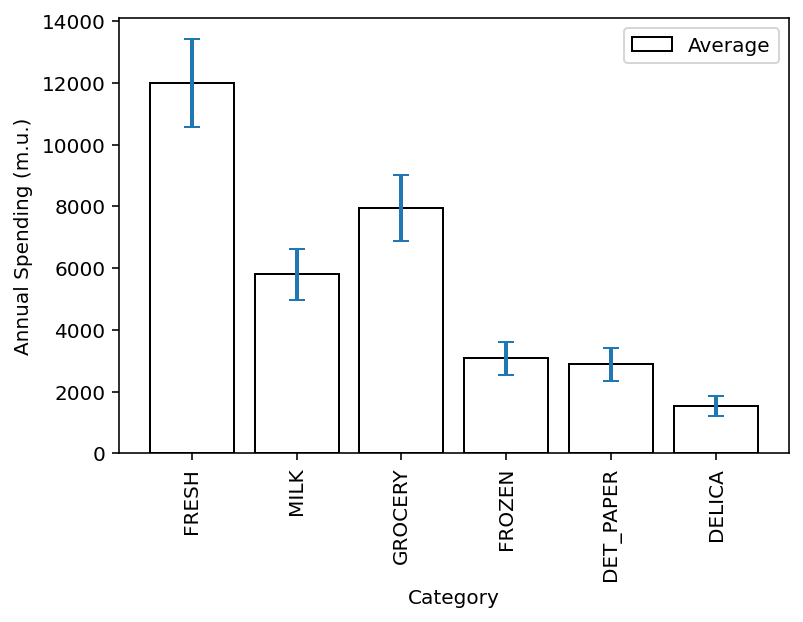

In [23]:
from scipy import stats

#df_part = df.loc[:100]
df_part = df.copy()
alpha = 0.95
dof = df_part.shape[1]-1
df_mean = df_part.mean()
df_sem = df_part.sem()
ci = stats.t.interval(alpha, dof, loc=0, scale=df_sem)
print(ci)  # debug
x=range(len(df_mean))
plt.bar(x, df_mean, color='white', edgecolor='black', label='Average')
plt.errorbar(x, df_mean, yerr=ci[1], elinewidth=2, capsize=4, linewidth=0)
plt.xticks(x, df_mean.index)
plt.xlabel('Category')
plt.ylabel('Annual Spending (m.u.)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Plot of a function & color according to a value  
Colormap: https://matplotlib.org/examples/color/colormaps_reference.html

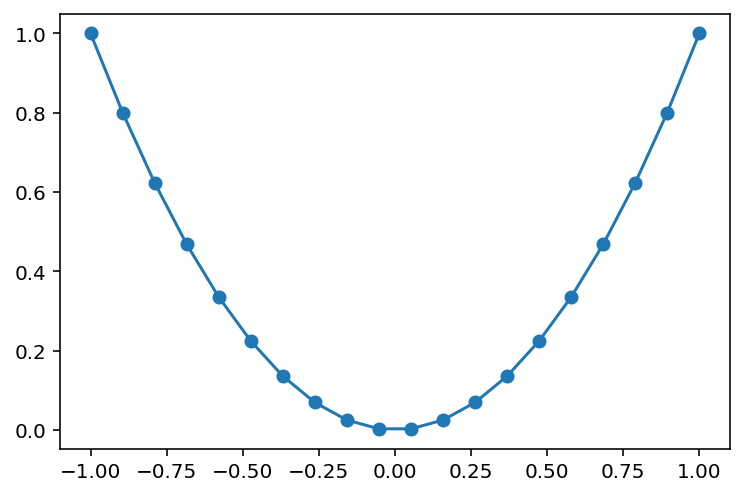

In [24]:
x = np.linspace(-1, 1, num=20)
y = x*x
plt.plot(x, y, marker='o')
plt.show()

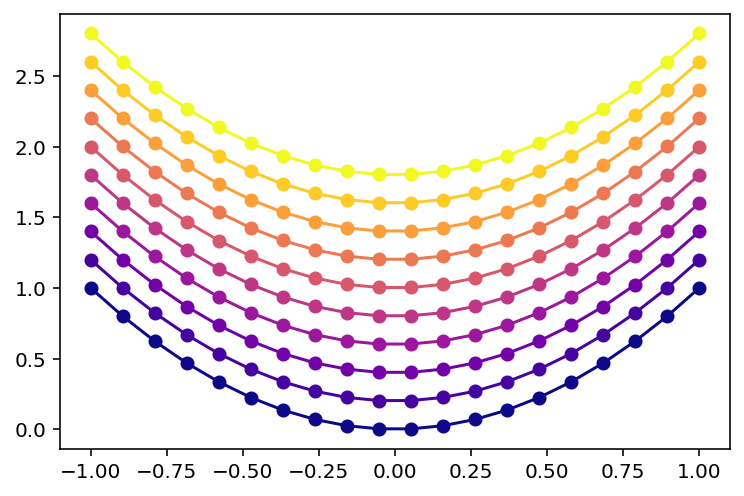

In [25]:
from matplotlib import cm

n = 10
x = np.linspace(-1, 1, num=20)
y = x*x
for i in range(n):
    plt.plot(x, y+0.2*i, marker='o', color=cm.plasma(i/(n-1)))
plt.show()

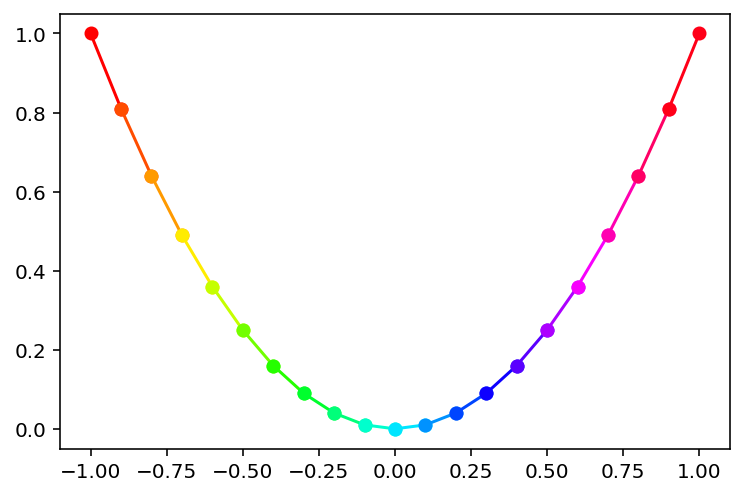

In [26]:
from matplotlib import cm

step = 0.1
x = np.arange(-1, 1, step)
for i,x1 in enumerate(x):
    xx = np.array([x1, x1+step])
    yy = xx * xx
    plt.plot(xx, yy, marker='o', color=cm.hsv(i/(len(x)-1)))
plt.show()

### Plot with two Y-axes

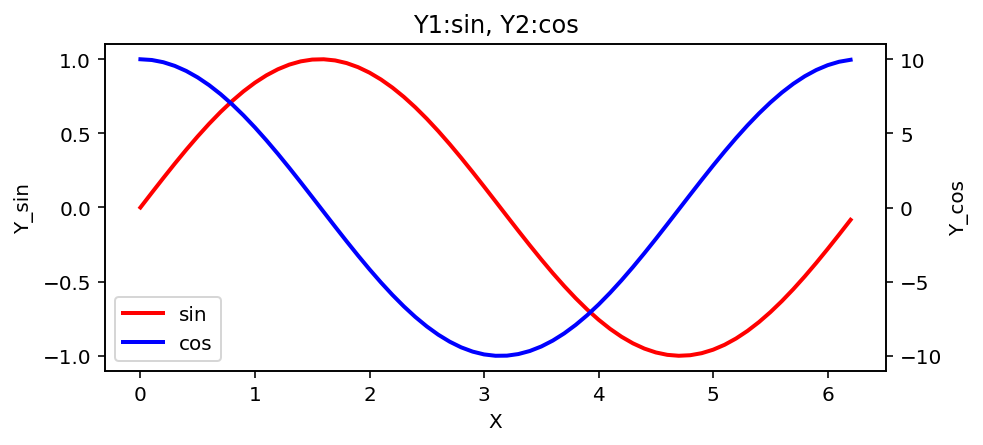

In [27]:
x = np.arange(0, np.pi*2, 0.1)
ys = np.sin(x)
yc = 10*np.cos(x)
fig, ax1 = plt.subplots(figsize=(7,3))
ax1.plot(x, ys, color='red', label='sin', linewidth=2)
ax2 = ax1.twinx()
ax2.plot(x, yc, color='blue', label='cos', linewidth=2)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower left')
ax1.set_ylabel('Y_sin')
ax2.set_ylabel('Y_cos')
ax1.set_xlabel('X')
plt.title('Y1:sin, Y2:cos')
plt.show()

### Do you prefer this kind of style!?  

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


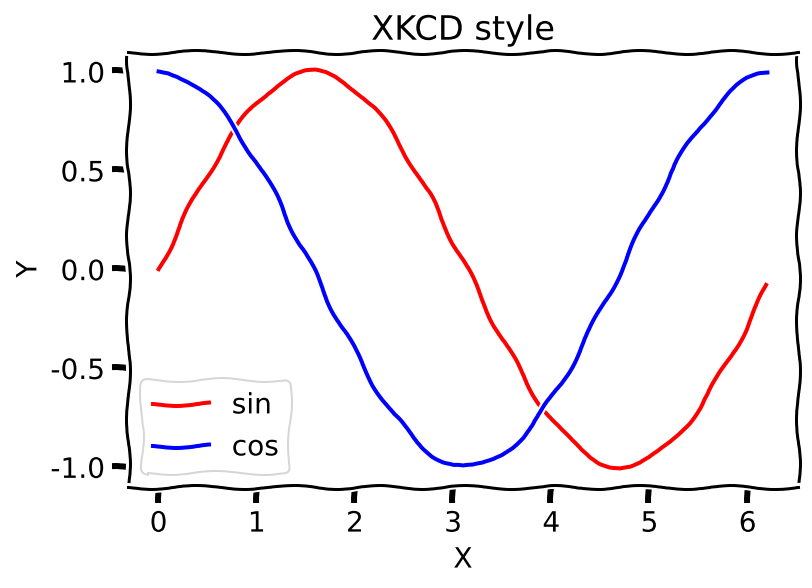

In [28]:
with plt.xkcd(scale=2, length=100, randomness=2):
    x = np.arange(0, np.pi*2, 0.1)
    ys = np.sin(x)
    yc = np.cos(x)
    plt.plot(x, ys, color='red', label='sin', linewidth=2)
    plt.plot(x, yc, color='blue', label='cos', linewidth=2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('XKCD style')
    plt.legend()
    plt.show()